In [1]:
k = 5   # electron momentum
p = 41  # proton momentum

In [2]:
import numpy as np
import uproot as ur
import awkward as ak
import matplotlib.pyplot as plt
import time
import matplotlib as mpl
import mplhep 

In [3]:
#2D logarithmically spaced bins in Q2 and 𝑥 for analysis

Q2_midpoints = [0.515,0.815,1.29,2.05,3.25,5.15,8.15,12.9,20.5,32.5,51.5,81.5,129,205,325,515,815,1.29E+03,2.05E+03,3.25E+03,5.15E+03]
Q2_bins = [0.40938507,0.64786184,1.025353587,1.626191868,2.581181894,4.091148983,6.478618696,10.25353599,16.26191868,25.81181894,40.91148983,64.78618696,102.5353599,162.6191868,258.1181894,409.1148983,647.8618696,1025.353599,1626.191868,2581.181894,4091.148983,6482.897648]

x_midpoints = [5.15E-05,8.15E-05,0.000129,0.000205,0.000325,0.000515,0.000815,0.00129,0.00205,0.00325,0.00515,0.00815,0.0129,0.0205,0.0325,0.0515,0.0815,0.129,0.205,0.325,0.515,0.815]
x_bins = [4.09385E-05,6.47862E-05,0.000102535,0.000162619,0.000258118,0.000409115,0.000647862,0.001025354,0.001626192,0.002581182,0.004091149,0.006478619,0.010253536,0.016261919,0.025811819,0.04091149,0.064786187,0.10253536,0.162619187,0.25811819,0.409114898,0.647861868,1.025257131]

# Asymmetry

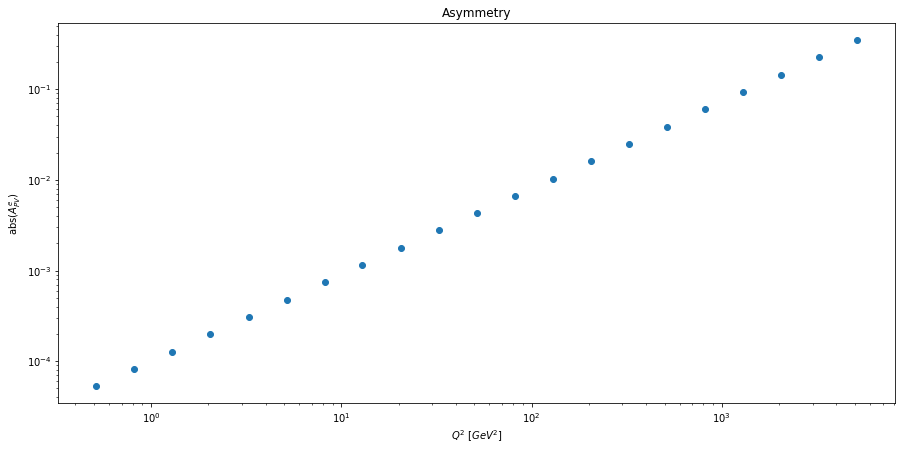

In [4]:
Q_midpoints = np.power(Q2_midpoints,0.5)
A = 0.0001 * (((Q_midpoints))**1.9079)

fig = plt.figure()
plt.xlabel('$Q^2$ [$GeV^2$]')
plt.ylabel('abs($A^e_{PV}$)')
plt.title('Asymmetry')
plt.scatter(Q2_midpoints,A)
plt.yscale('log')
plt.xscale('log')
fig.set_figheight(7)
fig.set_figwidth(15)
plt.show()

# Values

In [5]:
#define function that returns values of Q2 and x for 'Truth' Tbranch of 'events' TDirectory 
#Truth dataset includes the actual values used in constructing the simulation, also referred to as the thrown dataset
def valuesT(index):
    key = ur.concatenate(server + file + '{}*.root:events/InclusiveKinematicsTruth'.format(index))
    N_Q2s = key['InclusiveKinematicsTruth.Q2']
    N_xs = key['InclusiveKinematicsTruth.x']
    output = [N_Q2s,N_xs]
    return output


#define function that returns values of Q2 and x for 'Electron' Tbranch of 'events' TDirectory 
#Electron dataset includes values calculated from track reconstruction of the scattererd lepton
def valuesE(index):
    key = ur.concatenate(server + file + '{}*.root:events/InclusiveKinematicsElectron'.format(index))
    N_Q2s = key['InclusiveKinematicsElectron.Q2']
    N_xs = key['InclusiveKinematicsElectron.x']
    output = [N_Q2s,N_xs]
    return output


#define function that returns values of Q2 and x for 'Double-Angle' Tbranch of 'events' TDirectory 
#Double-Angle dataset includes values calculated assessing the scattered electron and the final hadronic system together
def valuesDA(index):
    key = ur.concatenate(server + file + '{}*.root:events/InclusiveKinematicsDA'.format(index))
    N_Q2s = key['InclusiveKinematicsDA.Q2']
    N_xs = key['InclusiveKinematicsDA.x']
    output = [N_Q2s,N_xs]
    return output


#define function that returns values of Q2 and x for 'Jacques-Blondel' Tbranch of 'events' TDirectory 
def valuesJB(index):
    key = ur.concatenate(server + file + '{}*.root:events/InclusiveKinematicsJB'.format(index))
    N_Q2s = key['InclusiveKinematicsJB.Q2']
    N_xs = key['InclusiveKinematicsJB.x']
    output = [N_Q2s,N_xs]
    return output

In [6]:
# #there are 5 sets of files with different cross sections. 
# #calling and storing values of Q2 and x for each set of files
# minQ2 = 1
# server = '~/projects/def-wdconinc/tooba/deathvalley/{}x{}/minQ2={}/'.format(k,p,minQ2)
# file = 'pythia8NCDIS_{}x{}_minQ2={}_beamEffects_xAngle=-0.025_hiDiv_vtxfix_'.format(k,p,minQ2)
# _5_41_Q2_1_1_T = valuesT(1)
# %store _5_41_Q2_1_1_T
# _5_41_Q2_1_1_E = valuesE(1)
# %store _5_41_Q2_1_1_E
# _5_41_Q2_1_1_DA = valuesDA(1)
# %store _5_41_Q2_1_1_DA
# _5_41_Q2_1_2_T = valuesT(2)
# %store _5_41_Q2_1_2_T
# _5_41_Q2_1_2_E = valuesE(2)
# %store _5_41_Q2_1_2_E
# _5_41_Q2_1_2_DA = valuesDA(2)
# %store _5_41_Q2_1_2_DA
# _5_41_Q2_1_3_T = valuesT(3)
# %store _5_41_Q2_1_3_T
# _5_41_Q2_1_3_E = valuesE(3)
# %store _5_41_Q2_1_3_E
# _5_41_Q2_1_3_DA = valuesDA(3)
# %store _5_41_Q2_1_3_DA
# _5_41_Q2_1_4_T = valuesT(4)
# %store _5_41_Q2_1_4_T
# _5_41_Q2_1_4_E = valuesE(4)
# %store _5_41_Q2_1_4_E
# _5_41_Q2_1_4_DA = valuesDA(4)
# %store _5_41_Q2_1_4_DA
# _5_41_Q2_1_5_T = valuesT(5)
# %store _5_41_Q2_1_5_T
# _5_41_Q2_1_5_E = valuesE(5)
# %store _5_41_Q2_1_5_E
# _5_41_Q2_1_5_DA = valuesDA(5)
# %store _5_41_Q2_1_5_DA
# # _5_41_Q2_1_1_JB = valuesKeyJB(1)
# # %store _5_41_Q2_1_1_JB
# # _5_41_Q2_1_2_JB = valuesKeyJB(2)
# # %store _5_41_Q2_1_2_JB
# # _5_41_Q2_1_3_JB = valuesKeyJB(3)
# # %store _5_41_Q2_1_3_JB
# # _5_41_Q2_1_4_JB = valuesKeyJB(4)
# # %store _5_41_Q2_1_4_JB
# # _5_41_Q2_1_5_JB = valuesKeyJB(5)
# # %store _5_41_Q2_1_5_JB
# minQ2 = 10
# server = '~/projects/def-wdconinc/tooba/deathvalley/{}x{}/minQ2={}/'.format(k,p,minQ2)
# file = 'pythia8NCDIS_{}x{}_minQ2={}_beamEffects_xAngle=-0.025_hiDiv_vtxfix_'.format(k,p,minQ2)
# _5_41_Q2_10_1_T = valuesKeyT(1)
# %store _5_41_Q2_10_1_T
# _5_41_Q2_10_1_E = valuesKeyE(1)
# %store _5_41_Q2_10_1_E
# _5_41_Q2_10_1_DA = valuesKeyDA(1)
# %store _5_41_Q2_10_1_DA
# _5_41_Q2_10_2_T = valuesKeyT(2)
# %store _5_41_Q2_10_2_T
# _5_41_Q2_10_2_E = valuesKeyE(2)
# %store _5_41_Q2_10_2_E
# _5_41_Q2_10_2_DA = valuesKeyDA(2)
# %store _5_41_Q2_10_2_DA
# _5_41_Q2_10_3_T = valuesKeyT(3)
# %store _5_41_Q2_10_3_T
# _5_41_Q2_10_3_E = valuesKeyE(3)
# %store _5_41_Q2_10_3_E
# _5_41_Q2_10_3_DA = valuesKeyDA(3)
# %store _5_41_Q2_10_3_DA
# _5_41_Q2_10_4_T = valuesKeyT(4)
# %store _5_41_Q2_10_4_T
# _5_41_Q2_10_4_E = valuesKeyE(4)
# %store _5_41_Q2_10_4_E
# _5_41_Q2_10_4_DA = valuesKeyDA(4)
# %store _5_41_Q2_10_4_DA
# _5_41_Q2_10_5_T = valuesKeyT(5)
# %store _5_41_Q2_10_5_T
# _5_41_Q2_10_5_E = valuesKeyE(5)
# %store _5_41_Q2_10_5_E
# _5_41_Q2_10_5_DA = valuesKeyDA(5)
# %store _5_41_Q2_10_5_DA
# # _5_41_Q2_10_1_JB = valuesKeyJB(1)
# # %store _5_41_Q2_10_1_JB
# # _5_41_Q2_10_2_JB = valuesKeyJB(2)
# # %store _5_41_Q2_10_2_JB
# # _5_41_Q2_10_3_JB = valuesKeyJB(3)
# # %store _5_41_Q2_10_3_JB
# # _5_41_Q2_10_4_JB = valuesKeyJB(4)
# # %store _5_41_Q2_10_4_JB
# # _5_41_Q2_10_5_JB = valuesKeyJB(5)
# # %store _5_41_Q2_10_5_JB
# minQ2 = 100
# server = '~/projects/def-wdconinc/tooba/deathvalley/{}x{}/minQ2={}/'.format(k,p,minQ2)
# file = 'pythia8NCDIS_{}x{}_minQ2={}_beamEffects_xAngle=-0.025_hiDiv_vtxfix_'.format(k,p,minQ2)
# _5_41_Q2_100_1_T = valuesKeyT(1)
# %store _5_41_Q2_100_1_T
# _5_41_Q2_100_1_E = valuesKeyE(1)
# %store _5_41_Q2_100_1_E
# _5_41_Q2_100_1_DA = valuesKeyDA(1)
# %store _5_41_Q2_100_1_DA
# _5_41_Q2_100_2_T = valuesKeyT(2)
# %store _5_41_Q2_100_2_T
# _5_41_Q2_100_2_E = valuesKeyE(2)
# %store _5_41_Q2_100_2_E
# _5_41_Q2_100_2_DA = valuesKeyDA(2)
# %store _5_41_Q2_100_2_DA
# _5_41_Q2_100_3_T = valuesKeyT(3)
# %store _5_41_Q2_100_3_T
# _5_41_Q2_100_3_E = valuesKeyE(3)
# %store _5_41_Q2_100_3_E
# _5_41_Q2_100_3_DA = valuesKeyDA(3)
# %store _5_41_Q2_100_3_DA
# _5_41_Q2_100_4_T = valuesKeyT(4)
# %store _5_41_Q2_100_4_T
# _5_41_Q2_100_4_E = valuesKeyE(4)
# %store _5_41_Q2_100_4_E
# _5_41_Q2_100_4_DA = valuesKeyDA(4)
# %store _5_41_Q2_100_4_DA
# _5_41_Q2_100_5_T = valuesKeyT(5)
# %store _5_41_Q2_100_5_T
# _5_41_Q2_100_5_E = valuesKeyE(5)
# %store _5_41_Q2_100_5_E
# _5_41_Q2_100_5_DA = valuesKeyDA(5)
# %store _5_41_Q2_100_5_DA
# # _5_41_Q2_100_1_JB = valuesKeyJB(1)
# # %store _5_41_Q2_100_1_JB
# # _5_41_Q2_100_2_JB = valuesKeyJB(2)
# # %store _5_41_Q2_100_2_JB
# # _5_41_Q2_100_3_JB = valuesKeyJB(3)
# # %store _5_41_Q2_100_3_JB
# # _5_41_Q2_100_4_JB = valuesKeyJB(4)
# # %store _5_41_Q2_100_4_JB
# # _5_41_Q2_100_5_JB = valuesKeyJB(5)
# # %store _5_41_Q2_100_5_JB

In [7]:
#refresh stored variables
%store -r _5_41_Q2_1_1_T
%store -r _5_41_Q2_1_1_E
%store -r _5_41_Q2_1_1_DA
%store -r _5_41_Q2_1_2_T
%store -r _5_41_Q2_1_2_E
%store -r _5_41_Q2_1_2_DA
%store -r _5_41_Q2_1_3_T
%store -r _5_41_Q2_1_3_E
%store -r _5_41_Q2_1_3_DA
%store -r _5_41_Q2_1_4_T
%store -r _5_41_Q2_1_4_E
%store -r _5_41_Q2_1_4_DA
%store -r _5_41_Q2_1_5_T
%store -r _5_41_Q2_1_5_E
%store -r _5_41_Q2_1_5_DA

%store -r _5_41_Q2_10_1_T
%store -r _5_41_Q2_10_1_E
%store -r _5_41_Q2_10_1_DA
%store -r _5_41_Q2_10_2_T
%store -r _5_41_Q2_10_2_E
%store -r _5_41_Q2_10_2_DA
%store -r _5_41_Q2_10_3_T
%store -r _5_41_Q2_10_3_E
%store -r _5_41_Q2_10_3_DA
%store -r _5_41_Q2_10_4_T
%store -r _5_41_Q2_10_4_E
%store -r _5_41_Q2_10_4_DA
%store -r _5_41_Q2_10_5_T
%store -r _5_41_Q2_10_5_E
%store -r _5_41_Q2_10_5_DA

%store -r _5_41_Q2_100_1_T
%store -r _5_41_Q2_100_1_E
%store -r _5_41_Q2_100_1_DA
%store -r _5_41_Q2_100_2_T
%store -r _5_41_Q2_100_2_E
%store -r _5_41_Q2_100_2_DA
%store -r _5_41_Q2_100_3_T
%store -r _5_41_Q2_100_3_E
%store -r _5_41_Q2_100_3_DA
%store -r _5_41_Q2_100_4_T
%store -r _5_41_Q2_100_4_E
%store -r _5_41_Q2_100_4_DA
%store -r _5_41_Q2_100_5_T
%store -r _5_41_Q2_100_5_E
%store -r _5_41_Q2_100_5_DA

# %store -r _5_41_Q2_1_1_JB
# %store -r _5_41_Q2_1_2_JB
# %store -r _5_41_Q2_1_3_JB
# %store -r _5_41_Q2_1_4_JB
# %store -r _5_41_Q2_1_5_JB
# %store -r _5_41_Q2_10_1_JB
# %store -r _5_41_Q2_10_2_JB
# %store -r _5_41_Q2_10_3_JB
# %store -r _5_41_Q2_10_4_JB
# %store -r _5_41_Q2_10_5_JB
# %store -r _5_41_Q2_100_1_JB
# %store -r _5_41_Q2_100_2_JB
# %store -r _5_41_Q2_100_3_JB
# %store -r _5_41_Q2_100_4_JB
# %store -r _5_41_Q2_100_5_JB

In [8]:
Q2_1_1_T=_5_41_Q2_1_1_T
Q2_1_1_E=_5_41_Q2_1_1_E
Q2_1_1_DA=_5_41_Q2_1_1_DA
Q2_1_2_T=_5_41_Q2_1_2_T
Q2_1_2_E=_5_41_Q2_1_2_E
Q2_1_2_DA=_5_41_Q2_1_2_DA
Q2_1_3_T=_5_41_Q2_1_3_T
Q2_1_3_E=_5_41_Q2_1_3_E
Q2_1_3_DA=_5_41_Q2_1_3_DA
Q2_1_4_T=_5_41_Q2_1_4_T
Q2_1_4_E=_5_41_Q2_1_4_E
Q2_1_4_DA=_5_41_Q2_1_4_DA
Q2_1_5_T=_5_41_Q2_1_5_T
Q2_1_5_E=_5_41_Q2_1_5_E
Q2_1_5_DA=_5_41_Q2_1_5_DA

Q2_10_1_T=_5_41_Q2_10_1_T
Q2_10_1_E=_5_41_Q2_10_1_E
Q2_10_1_DA=_5_41_Q2_10_1_DA
Q2_10_2_T=_5_41_Q2_10_2_T
Q2_10_2_E=_5_41_Q2_10_2_E
Q2_10_2_DA=_5_41_Q2_10_2_DA
Q2_10_3_T=_5_41_Q2_10_3_T
Q2_10_3_E=_5_41_Q2_10_3_E
Q2_10_3_DA=_5_41_Q2_10_3_DA
Q2_10_4_T=_5_41_Q2_10_4_T
Q2_10_4_E=_5_41_Q2_10_4_E
Q2_10_4_DA=_5_41_Q2_10_4_DA
Q2_10_5_T=_5_41_Q2_10_5_T
Q2_10_5_E=_5_41_Q2_10_5_E
Q2_10_5_DA=_5_41_Q2_10_5_DA

Q2_100_1_T=_5_41_Q2_100_1_T
Q2_100_1_E=_5_41_Q2_100_1_E
Q2_100_1_DA=_5_41_Q2_100_1_DA
Q2_100_2_T=_5_41_Q2_100_2_T
Q2_100_2_E=_5_41_Q2_100_2_E
Q2_100_2_DA=_5_41_Q2_100_2_DA
Q2_100_3_T=_5_41_Q2_100_3_T
Q2_100_3_E=_5_41_Q2_100_3_E
Q2_100_3_DA=_5_41_Q2_100_3_DA
Q2_100_4_T=_5_41_Q2_100_4_T
Q2_100_4_E=_5_41_Q2_100_4_E
Q2_100_4_DA=_5_41_Q2_100_4_DA
Q2_100_5_T=_5_41_Q2_100_5_T
Q2_100_5_E=_5_41_Q2_100_5_E
Q2_100_5_DA=_5_41_Q2_100_5_DA

# Q2_1_1_JB=_5_41_Q2_1_1_JB
# Q2_1_2_JB=_5_41_Q2_1_2_JB
# Q2_1_3_JB=_5_41_Q2_1_3_JB
# Q2_1_4_JB=_5_41_Q2_1_4_JB
# Q2_1_5_JB=_5_41_Q2_1_5_JB
# Q2_10_1_JB=_5_41_Q2_10_1_JB
# Q2_10_2_JB=_5_41_Q2_10_2_JB
# Q2_10_3_JB=_5_41_Q2_10_3_JB
# Q2_10_4_JB=_5_41_Q2_10_4_JB
# Q2_10_5_JB=_5_41_Q2_10_5_JB
# Q2_100_1_JB=_5_41_Q2_100_1_JB
# Q2_100_2_JB=_5_41_Q2_100_2_JB
# Q2_100_3_JB=_5_41_Q2_100_3_JB
# Q2_100_4_JB=_5_41_Q2_100_4_JB
# Q2_100_5_JB=_5_41_Q2_100_5_JB

# $Q^2$ correlation

# Electron

## $min Q^2 = 1$

Number of events

In [55]:
minQ2 = 1
Q2_List_E = [Q2_1_1_E[0],Q2_1_2_E[0],Q2_1_3_E[0],Q2_1_4_E[0],Q2_1_5_E[0]] #list of Q2 values
x_List_E = [Q2_1_1_E[1],Q2_1_2_E[1],Q2_1_3_E[1],Q2_1_4_E[1],Q2_1_5_E[1]] #list of x values

#count of events in 2D bins for Electron method
count_E = [0,0,0,0,0] 
for i in range(5):
    N_Q2s=Q2_List_E[i]
    N_xs=x_List_E[i]
    (h, xedges, yedges, image) = plt.hist2d(ak.to_numpy(ak.flatten(N_Q2s)), ak.to_numpy(ak.flatten(N_xs)), [Q2_bins,x_bins])
    plt.close()
    count_E[i] = h


#cross section of each set of files
sigma_dict = {'1_1':4.000E-04,'1_2':4.004E-04,'1_3':4.005E-04,'1_4':4.005E-04,'1_5':3.998E-04,'10_1':2.034E-05,'10_2':2.034E-05,'10_3':2.035E-05,'10_4':2.036E-05,'10_5':2.034E-05,'100_1':2.867E-07,'100_2':2.869E-07,'100_3':2.867E-07,'100_4':2.871E-07,'100_5':2.868E-07}
#count of events in 100fb-1 cross section
count_E_fb = [[],[],[],[],[]]
#Q2 bin index at which minQ2 starts
minQ2_dict = {'1':2,'10':7,'100':12,'1000':17}
for i in range(5):
    h = count_E[i]
    L = (1000000/(sigma_dict['{}_{}'.format(minQ2,i+1)]*(1.0e+12))) #measure luminosity of the reaction
    for ii in h:
        count_E_fb[i].append(np.multiply(ii,(100/L))) #cross section in 100fb-1 unit
    minQ2_lim = minQ2_dict['{}'.format(minQ2)]
    count_E_fb[i][0:minQ2_lim] = np.multiply(count_E_fb[i][0:minQ2_lim],0) #ignore values before minQ2
    count_E_fb[i] = ak.Array(count_E_fb[i])
count_E_fb_all = np.multiply(1/5,(count_E_fb[0]+count_E_fb[1]+count_E_fb[2]+count_E_fb[3]+count_E_fb[4]))

<ipython-input-56-9129fdf880c7>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = plt.pcolor(X,Y,Z,cmap = cmap, norm=mpl.colors.LogNorm())


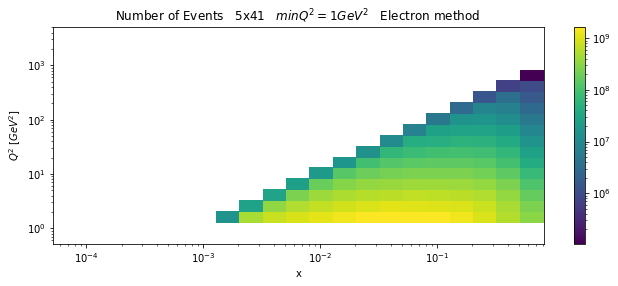

In [56]:
x = x_midpoints
y = Q2_midpoints
X,Y=np.meshgrid(x,y)
fig = plt.figure()
Z = count_E_fb_all
cmap = mpl.cm.get_cmap('viridis').copy()
im = plt.pcolor(X,Y,Z,cmap = cmap, norm=mpl.colors.LogNorm())
plt.yscale('log')
plt.xscale('log')
fig.set_figwidth(11)
plt.colorbar(im)
plt.ylabel('$Q^2$ [$GeV^2$]')
plt.xlabel('x')
plt.title('Number of Events   {}x{}   $minQ^2=${}$GeV^2$   Electron method'.format(k,p,minQ2))
fig.set_figwidth(11)
plt.show()  

Relative Uncertainty

/home/tooba/.local/lib/python3.8/site-packages/awkward/_connect/_numpy.py:209: RuntimeWarning: divide by zero encountered in true_divide
  result = getattr(ufunc, method)(


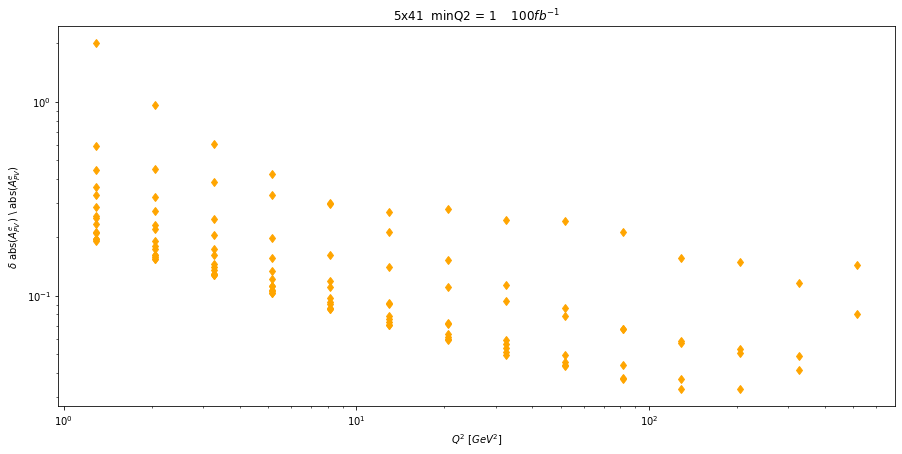

<ipython-input-57-8401841e47cb>:34: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = plt.pcolor(X,Y,Z,cmap = cmap_r, norm=mpl.colors.LogNorm(vmin=vmin,vmax=vmax),vmax=vmax,vmin=vmin)
<ipython-input-57-8401841e47cb>:34: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im = plt.pcolor(X,Y,Z,cmap = cmap_r, norm=mpl.colors.LogNorm(vmin=vmin,vmax=vmax),vmax=vmax,vmin=vmin)


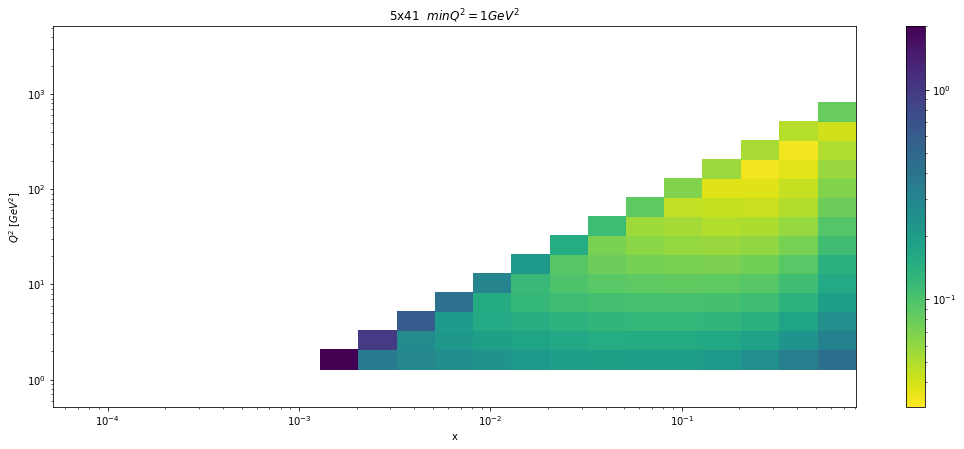

In [57]:
E_un = 1/np.sqrt(count_E_fb_all) #uncertainty in the number of events,

#Asymmetry 2D grid 
A2d = []
for i in range(len(Q2_midpoints)):
    x_times = np.arange(1,len(x_midpoints)+1,1)
    x_times = list(x_times*0 + A[i])
    A2d.append(x_times)

#relative uncertainty in the asymmetry
E_un_R = ak.to_numpy(E_un/A2d)
E_1 = E_un_R

fig = plt.figure()
plt.xlabel('$Q^2$ [$GeV^2$]')
plt.ylabel('$\delta$ abs($A^e_{PV}$) \ abs($A^e_{PV}$)')
plt.title('{}x{}  minQ2 = {}    '.format(k,p,minQ2)+ '$100 fb^{-1}$')
plt.plot(Q2_midpoints,E_1,'d',color='orange', label = 'minQ2 = {}'.format(1))
plt.yscale('log')
plt.xscale('log')
fig.set_figheight(7)
fig.set_figwidth(15)
plt.show()


x = x_midpoints
y = Q2_midpoints
Z = E_1
vmin = (0.1-((0.1/9)*6.25))
vmax=2
X,Y=np.meshgrid(x,y)
fig = plt.figure()
cmap_r = mpl.cm.get_cmap('viridis_r').copy()
im = plt.pcolor(X,Y,Z,cmap = cmap_r, norm=mpl.colors.LogNorm(vmin=vmin,vmax=vmax),vmax=vmax,vmin=vmin)
plt.yscale('log')
plt.xscale('log')
fig.set_figheight(7)
fig.set_figwidth(18)
plt.colorbar(im)
plt.ylabel('$Q^2$ [$GeV^2$]')
plt.xlabel('x')
plt.title('{}x{}  $minQ^2=${}$GeV^2$'.format(k,p,minQ2))
plt.show()  

Correlation

<ipython-input-58-9bb5906b395d>:35: RuntimeWarning: invalid value encountered in true_divide
  alpha = h[i]/col_sum[i]


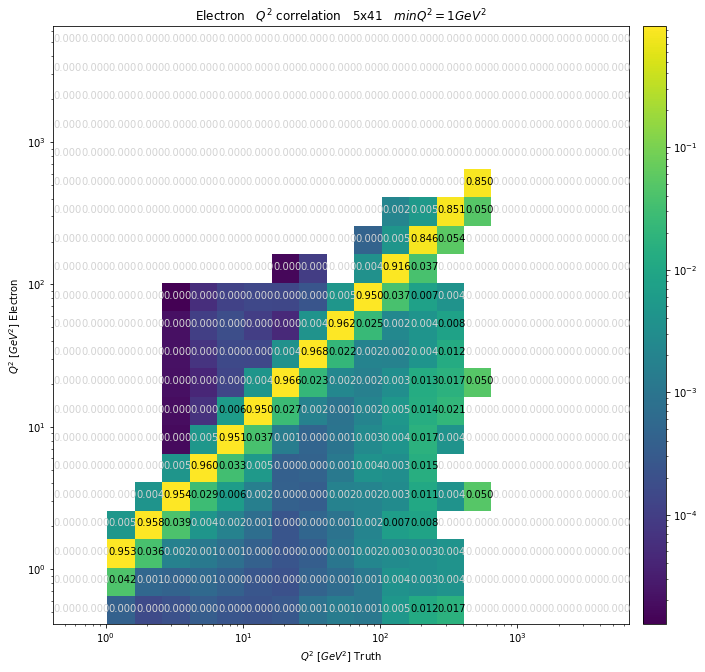

In [58]:
minQ2 = 1
Q2_List_T_F = [[],[],[],[],[]]
Q2_List_E_F = [[],[],[],[],[]]

Q2_List_T = [Q2_1_1_T[0],Q2_1_2_T[0],Q2_1_3_T[0],Q2_1_4_T[0],Q2_1_5_T[0]] #list of Q2 values in Truth key
Q2_List_E = [Q2_1_1_E[0],Q2_1_2_E[0],Q2_1_3_E[0],Q2_1_4_E[0],Q2_1_5_E[0]] #list of Q2 values in Electron key

for i in range(5):
    T_len = ak.count(Q2_List_T[i],axis=0) #total number of events in Truth
    E_len = ak.count(Q2_List_E[i],axis=0) #total number of events in Electron
    if T_len > E_len: #if total number of events for Truth is greater than Electron
        E_boolean = ak.count(Q2_List_E[i],axis=-1) >= 1 #boolean to filter events that corresponds to record of a single event in Electron
        Q2_List_T_F[i] = ak.flatten( Q2_List_T[i][E_boolean]) 
        Q2_List_E_F[i] = ak.flatten( Q2_List_E[i][E_boolean])
    else: #if total number of events for Electron is greater than Truth
        T_boolean = ak.count(Q2_List_T[i],axis=-1) >= 1 #boolean to filter events that corresponds to record of a single event in Truth
        Q2_List_T_F[i] = ak.flatten( Q2_List_T[i][T_boolean])
        Q2_List_E_F[i] = ak.flatten( Q2_List_E[i][T_boolean])
T_Q2s = ak.flatten(Q2_List_T_F)
E_Q2s = ak.flatten(Q2_List_E_F)


fig = plt.figure()
(h, xedges, yedges, image) =plt.hist2d(x=T_Q2s,y=E_Q2s, bins=[Q2_bins,Q2_bins],norm=mpl.colors.LogNorm())
plt.close()


minQ2_dict = {'1':2,'10':7,'100':12,'1000':17} #Q2 bin index at which minQ2 starts
minQ2_lim = minQ2_dict['{}'.format(minQ2)]
h[0:minQ2_lim]=0 #ignore values before minQ2

col_sum = ak.sum(h,axis=-1) #number of events in each column 
norm_h = [] #normalized grid
for i in range(len(col_sum)):
    alpha = h[i]/col_sum[i]
    norm_h.append(alpha)


#change np.nan values to 0
norm_h[0][:] = 0.0
norm_h[1][:] = 0.0
norm_h[-1][:] = 0.0
norm_h[-2][:] = 0.0
norm_h[-3][:] = 0.0
norm_h[-4][:] = 0.0
norm_h[-5][:] = 0.0


norm_h_text = []
for i in range(len(col_sum)):
    alpha = norm_h[i]
    alpha2 = [ '%.3f' % elem for elem in alpha ] #display value to 3 sig fig
    norm_h_text.append(alpha2)
    
    
fig = plt.figure()
mplhep.hist2dplot(H=norm_h,norm=mpl.colors.LogNorm(),labels=norm_h_text,xbins=Q2_bins,ybins=Q2_bins,cmax=1,cmin=1e-5)
plt.yscale('log')
plt.xscale('log')
fig.set_figwidth(11)
fig.set_figheight(11)
plt.xlabel('$Q^2$ [$GeV^2$] Truth')
plt.ylabel('$Q^2$ [$GeV^2$] Electron')
plt.title('Electron   $Q^2$ correlation   {}x{}   $minQ^2=${}$GeV^2$'.format(k,p,minQ2))
plt.show()


Systematic Uncertainty

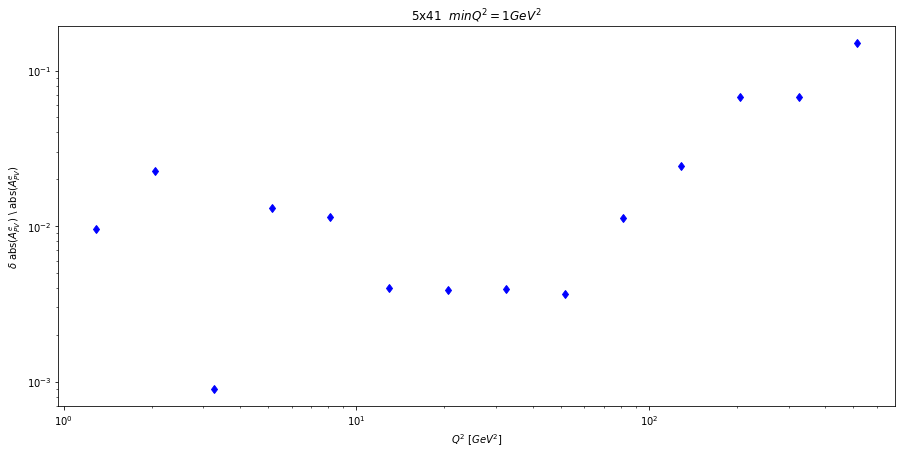

In [59]:
# transpose
norm_h_T = np.array(norm_h).T  

A_mesh,Q2_mesh = np.meshgrid(A,Q2_midpoints)
A_ = norm_h_T*A_mesh  #fraction(s) of asymmetry(s)

A_1_ = []
for j in range(20):
    _1_ = A_[j][j-1]
    _2_ = A_[j][j]
    _3_ = A_[j][j+1]
    listt = [_1_,_2_,_3_] 
    A_1_.append(listt)
for i in range(1):
    _1_ = A_[j][j-1]
    _2_ = A_[j][j]
    listt = [_1_,_2_]
    A_1_.append(listt)  
A_1_ = ak.Array(A_1_)

#systematic uncertanity in asymmetry
R_A = np.absolute(A-(ak.sum(A_1_,axis=-1)))/A
R_A = ak.to_numpy(R_A)

#ignore values before minQ2
R_A[0:2] = np.nan
R_A[-5:] = np.nan


fig = plt.figure()
plt.xlabel('$Q^2$ [$GeV^2$]')
plt.ylabel('$\delta$ abs($A^e_{PV}$) \ abs($A^e_{PV}$)')
plt.title('{}x{}  $minQ^2=${}$GeV^2$'.format(k,p,minQ2))
plt.plot(Q2_midpoints,R_A,'d',color='b')

plt.yscale('log')
plt.xscale('log')
fig.set_figheight(7)
fig.set_figwidth(15)
plt.show()

R_A_1 = R_A


## $min Q^2 = 10$

<ipython-input-60-8cb7a4809721>:35: RuntimeWarning: invalid value encountered in true_divide
  alpha = h[i]/col_sum[i]


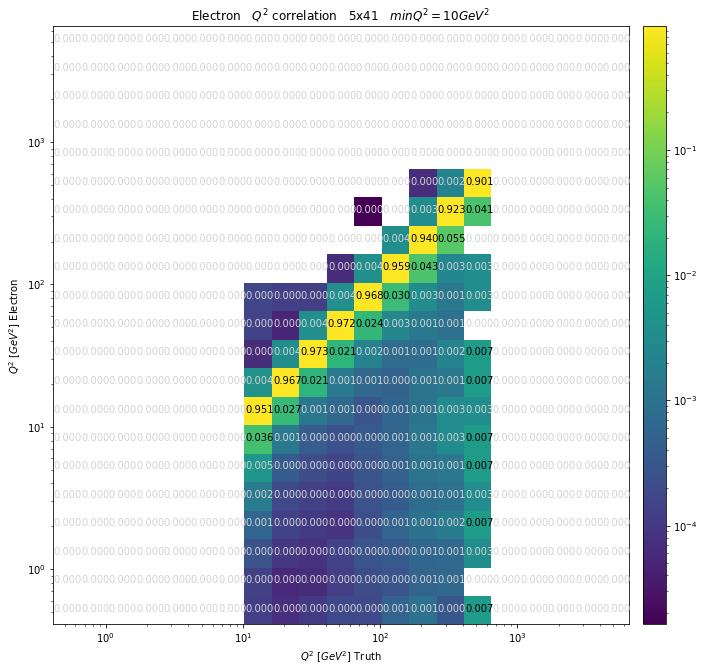

In [60]:
minQ2 = 10
Q2_List_T_F = [[],[],[],[],[]]
Q2_List_E_F = [[],[],[],[],[]]

Q2_List_T = [Q2_10_1_T[0],Q2_10_2_T[0],Q2_10_3_T[0],Q2_10_4_T[0],Q2_10_5_T[0]] #list of Q2 values in Truth key
Q2_List_E = [Q2_10_1_E[0],Q2_10_2_E[0],Q2_10_3_E[0],Q2_10_4_E[0],Q2_10_5_E[0]] #list of Q2 values in Electron key

for i in range(5):
    T_len = ak.count(Q2_List_T[i],axis=0) #total number of events in Truth
    E_len = ak.count(Q2_List_E[i],axis=0) #total number of events in Electron
    if T_len > E_len: #if total number of events for Truth is greater than Electron
        E_boolean = ak.count(Q2_List_E[i],axis=-1) >= 1 #boolean to filter events that corresponds to record of a single event in Electron
        Q2_List_T_F[i] = ak.flatten( Q2_List_T[i][E_boolean]) 
        Q2_List_E_F[i] = ak.flatten( Q2_List_E[i][E_boolean])
    else: #if total number of events for Electron is greater than Truth
        T_boolean = ak.count(Q2_List_T[i],axis=-1) >= 1 #boolean to filter events that corresponds to record of a single event in Truth
        Q2_List_T_F[i] = ak.flatten( Q2_List_T[i][T_boolean])
        Q2_List_E_F[i] = ak.flatten( Q2_List_E[i][T_boolean])
T_Q2s = ak.flatten(Q2_List_T_F)
E_Q2s = ak.flatten(Q2_List_E_F)


fig = plt.figure()
(h, xedges, yedges, image) =plt.hist2d(x=T_Q2s,y=E_Q2s, bins=[Q2_bins,Q2_bins],norm=mpl.colors.LogNorm())
plt.close()


minQ2_dict = {'1':2,'10':7,'100':12,'1000':17} #Q2 bin index at which minQ2 starts
minQ2_lim = minQ2_dict['{}'.format(minQ2)]
h[0:minQ2_lim]=0 #ignore values before minQ2

col_sum = ak.sum(h,axis=-1) #number of events in each column 
norm_h = [] #normalized grid
for i in range(len(col_sum)):
    alpha = h[i]/col_sum[i]
    norm_h.append(alpha)


#change np.nan values to 0
norm_h[0][:] = 0.0
norm_h[1][:] = 0.0
norm_h[2][:] = 0.0
norm_h[3][:] = 0.0
norm_h[4][:] = 0.0
norm_h[5][:] = 0.0
norm_h[6][:] = 0.0
norm_h[-1][:] = 0.0
norm_h[-2][:] = 0.0
norm_h[-3][:] = 0.0
norm_h[-4][:] = 0.0
norm_h[-5][:] = 0.0


norm_h_text = []
for i in range(len(col_sum)):
    alpha = norm_h[i]
    alpha2 = [ '%.3f' % elem for elem in alpha ] #display value to 3 sig fig
    norm_h_text.append(alpha2)
    
    
fig = plt.figure()
mplhep.hist2dplot(H=norm_h,norm=mpl.colors.LogNorm(),labels=norm_h_text,xbins=Q2_bins,ybins=Q2_bins,cmax=1,cmin=1e-5)
plt.yscale('log')
plt.xscale('log')
fig.set_figwidth(11)
fig.set_figheight(11)
plt.xlabel('$Q^2$ [$GeV^2$] Truth')
plt.ylabel('$Q^2$ [$GeV^2$] Electron')
plt.title('Electron   $Q^2$ correlation   {}x{}   $minQ^2=${}$GeV^2$'.format(k,p,minQ2))
plt.show()


## $min Q^2 = 100$

<ipython-input-61-0720a857a0a5>:35: RuntimeWarning: invalid value encountered in true_divide
  alpha = h[i]/col_sum[i]


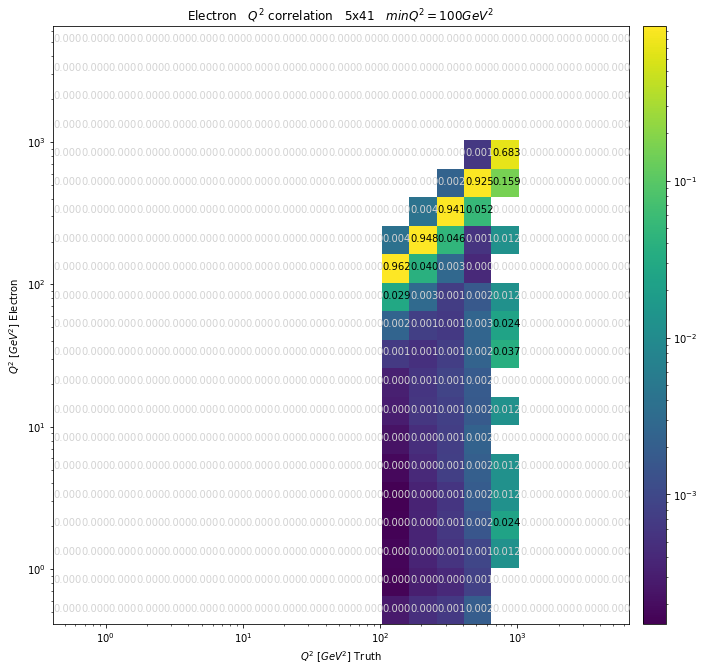

In [61]:
minQ2 = 100
Q2_List_T_F = [[],[],[],[],[]]
Q2_List_E_F = [[],[],[],[],[]]

Q2_List_T = [Q2_100_1_T[0],Q2_100_2_T[0],Q2_100_3_T[0],Q2_100_4_T[0],Q2_100_5_T[0]] #list of Q2 values in Truth key
Q2_List_E = [Q2_100_1_E[0],Q2_100_2_E[0],Q2_100_3_E[0],Q2_100_4_E[0],Q2_100_5_E[0]] #list of Q2 values in Electron key

for i in range(5):
    T_len = ak.count(Q2_List_T[i],axis=0) #total number of events in Truth
    E_len = ak.count(Q2_List_E[i],axis=0) #total number of events in Electron
    if T_len > E_len: #if total number of events for Truth is greater than Electron
        E_boolean = ak.count(Q2_List_E[i],axis=-1) >= 1 #boolean to filter events that corresponds to record of a single event in Electron
        Q2_List_T_F[i] = ak.flatten( Q2_List_T[i][E_boolean]) 
        Q2_List_E_F[i] = ak.flatten( Q2_List_E[i][E_boolean])
    else: #if total number of events for Electron is greater than Truth
        T_boolean = ak.count(Q2_List_T[i],axis=-1) >= 1 #boolean to filter events that corresponds to record of a single event in Truth
        Q2_List_T_F[i] = ak.flatten( Q2_List_T[i][T_boolean])
        Q2_List_E_F[i] = ak.flatten( Q2_List_E[i][T_boolean])
T_Q2s = ak.flatten(Q2_List_T_F)
E_Q2s = ak.flatten(Q2_List_E_F)


fig = plt.figure()
(h, xedges, yedges, image) =plt.hist2d(x=T_Q2s,y=E_Q2s, bins=[Q2_bins,Q2_bins],norm=mpl.colors.LogNorm())
plt.close()


minQ2_dict = {'1':2,'10':7,'100':12,'1000':17} #Q2 bin index at which minQ2 starts
minQ2_lim = minQ2_dict['{}'.format(minQ2)]
h[0:minQ2_lim]=0 #ignore values before minQ2

col_sum = ak.sum(h,axis=-1) #number of events in each column 
norm_h = [] #normalized grid
for i in range(len(col_sum)):
    alpha = h[i]/col_sum[i]
    norm_h.append(alpha)


#change np.nan values to 0
norm_h[0][:] = 0.0
norm_h[1][:] = 0.0
norm_h[2][:] = 0.0
norm_h[3][:] = 0.0
norm_h[4][:] = 0.0
norm_h[5][:] = 0.0
norm_h[6][:] = 0.0
norm_h[7][:] = 0.0
norm_h[8][:] = 0.0
norm_h[9][:] = 0.0
norm_h[10][:] = 0.0
norm_h[11][:] = 0.0
norm_h[-1][:] = 0.0
norm_h[-2][:] = 0.0
norm_h[-3][:] = 0.0
norm_h[-4][:] = 0.0


norm_h_text = []
for i in range(len(col_sum)):
    alpha = norm_h[i]
    alpha2 = [ '%.3f' % elem for elem in alpha ] #display value to 3 sig fig
    norm_h_text.append(alpha2)
    
    
fig = plt.figure()
mplhep.hist2dplot(H=norm_h,norm=mpl.colors.LogNorm(),labels=norm_h_text,xbins=Q2_bins,ybins=Q2_bins,cmax=1,cmin=1e-5)
plt.yscale('log')
plt.xscale('log')
fig.set_figwidth(11)
fig.set_figheight(11)
plt.xlabel('$Q^2$ [$GeV^2$] Truth')
plt.ylabel('$Q^2$ [$GeV^2$] Electron')
plt.title('Electron   $Q^2$ correlation   {}x{}   $minQ^2=${}$GeV^2$'.format(k,p,minQ2))
plt.show()


# Double-Angle

## $min Q^2 = 1$

<ipython-input-62-21e3c20f40eb>:35: RuntimeWarning: invalid value encountered in true_divide
  alpha = h[i]/col_sum[i]


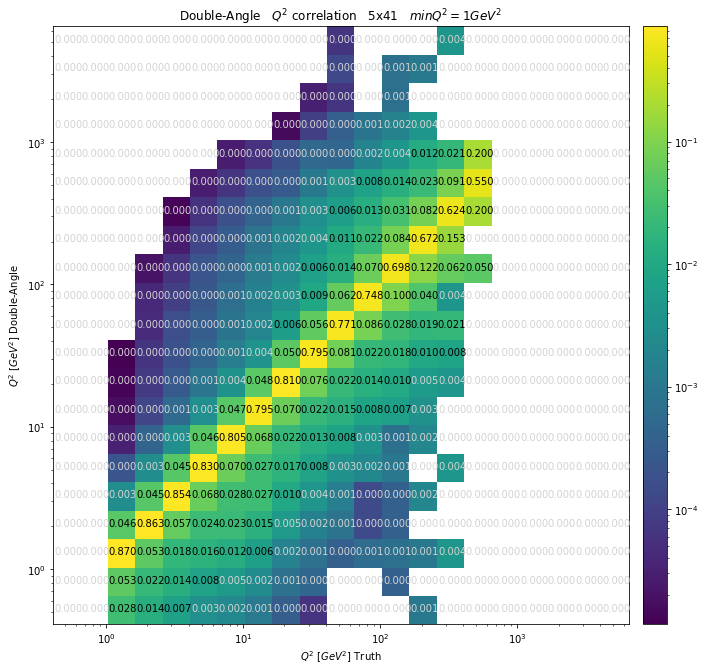

In [62]:
minQ2 = 1
Q2_List_T_F = [[],[],[],[],[]]
Q2_List_DA_F = [[],[],[],[],[]]

Q2_List_T = [Q2_1_1_T[0],Q2_1_2_T[0],Q2_1_3_T[0],Q2_1_4_T[0],Q2_1_5_T[0]]
Q2_List_DA = [Q2_1_1_DA[0],Q2_1_2_DA[0],Q2_1_3_DA[0],Q2_1_4_DA[0],Q2_1_5_DA[0]]

for i in range(5):
    T_len = ak.count(Q2_List_T[i],axis=0) #total number of events in Truth
    DA_len = ak.count(Q2_List_DA[i],axis=0) #total number of events in DA
    if T_len > DA_len: #if total number of events for Truth is greater than DA
        DA_boolean = ak.count(Q2_List_DA[i],axis=-1) >= 1 #boolean to filter events that corresponds to record of a single event in DA
        Q2_List_T_F[i] = ak.flatten( Q2_List_T[i][DA_boolean]) 
        Q2_List_DA_F[i] = ak.flatten( Q2_List_DA[i][DA_boolean])
    else: #if total number of events for DA is greater than Truth
        T_boolean = ak.count(Q2_List_T[i],axis=-1) >= 1 #boolean to filter events that corresponds to record of a single event in Truth
        Q2_List_T_F[i] = ak.flatten( Q2_List_T[i][T_boolean])
        Q2_List_DA_F[i] = ak.flatten( Q2_List_DA[i][T_boolean])
T_Q2s = ak.flatten(Q2_List_T_F)
DA_Q2s = ak.flatten(Q2_List_DA_F)


fig = plt.figure()
(h, xedges, yedges, image) =plt.hist2d(x=T_Q2s,y=DA_Q2s, bins=[Q2_bins,Q2_bins],norm=mpl.colors.LogNorm())
plt.close()


minQ2_dict = {'1':2,'10':7,'100':12,'1000':17} #Q2 bin index at which minQ2 starts
minQ2_lim = minQ2_dict['{}'.format(minQ2)]
h[0:minQ2_lim]=0 #ignore values before minQ2

col_sum = ak.sum(h,axis=-1) #number of events in each column 
norm_h = [] #normalized grid
for i in range(len(col_sum)):
    alpha = h[i]/col_sum[i]
    norm_h.append(alpha)


#change np.nan values to 0
norm_h[0][:] = 0.0
norm_h[1][:] = 0.0
norm_h[-1][:] = 0.0
norm_h[-2][:] = 0.0
norm_h[-3][:] = 0.0
norm_h[-4][:] = 0.0
norm_h[-5][:] = 0.0


norm_h_text = []
for i in range(len(col_sum)):
    alpha = norm_h[i]
    alpha2 = [ '%.3f' % elem for elem in alpha ] #display value to 3 sig fig
    norm_h_text.append(alpha2)
    
    
fig = plt.figure()
mplhep.hist2dplot(H=norm_h,norm=mpl.colors.LogNorm(),labels=norm_h_text,xbins=Q2_bins,ybins=Q2_bins,cmax=1,cmin=1e-5)
plt.yscale('log')
plt.xscale('log')
fig.set_figwidth(11)
fig.set_figheight(11)
plt.xlabel('$Q^2$ [$GeV^2$] Truth')
plt.ylabel('$Q^2$ [$GeV^2$] Double-Angle')
plt.title('Double-Angle   $Q^2$ correlation   {}x{}   $minQ^2=${}$GeV^2$'.format(k,p,minQ2))
plt.show()


## $min Q^2 = 10$

<ipython-input-63-61b2b4d5b7a2>:35: RuntimeWarning: invalid value encountered in true_divide
  alpha = h[i]/col_sum[i]


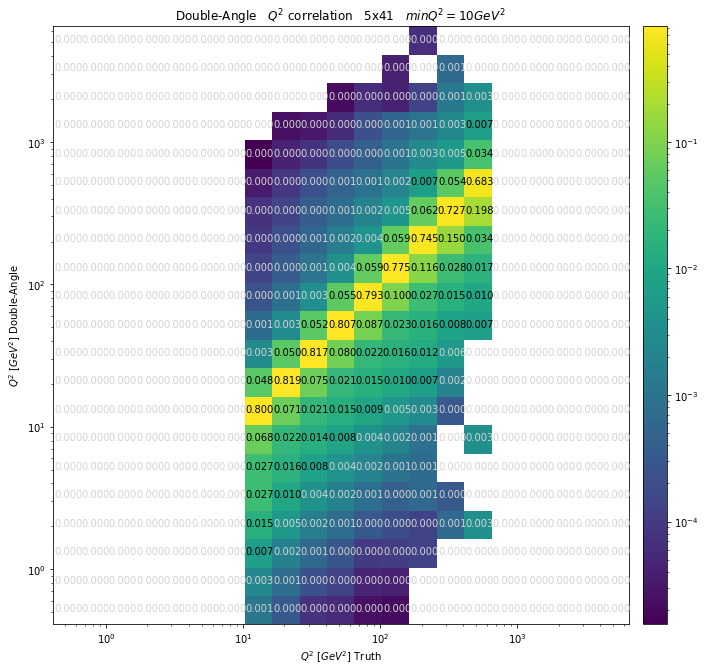

In [63]:
minQ2 = 10
Q2_List_T_F = [[],[],[],[],[]]
Q2_List_DA_F = [[],[],[],[],[]]

Q2_List_T = [Q2_10_1_T[0],Q2_10_2_T[0],Q2_10_3_T[0],Q2_10_4_T[0],Q2_10_5_T[0]]
Q2_List_DA = [Q2_10_1_DA[0],Q2_10_2_DA[0],Q2_10_3_DA[0],Q2_10_4_DA[0],Q2_10_5_DA[0]]

for i in range(5):
    T_len = ak.count(Q2_List_T[i],axis=0) #total number of events in Truth
    DA_len = ak.count(Q2_List_DA[i],axis=0) #total number of events in DA
    if T_len > DA_len: #if total number of events for Truth is greater than DA
        DA_boolean = ak.count(Q2_List_DA[i],axis=-1) >= 1 #boolean to filter events that corresponds to record of a single event in DA
        Q2_List_T_F[i] = ak.flatten( Q2_List_T[i][DA_boolean]) 
        Q2_List_DA_F[i] = ak.flatten( Q2_List_DA[i][DA_boolean])
    else: #if total number of events for DA is greater than Truth
        T_boolean = ak.count(Q2_List_T[i],axis=-1) >= 1 #boolean to filter events that corresponds to record of a single event in Truth
        Q2_List_T_F[i] = ak.flatten( Q2_List_T[i][T_boolean])
        Q2_List_DA_F[i] = ak.flatten( Q2_List_DA[i][T_boolean])
T_Q2s = ak.flatten(Q2_List_T_F)
DA_Q2s = ak.flatten(Q2_List_DA_F)


fig = plt.figure()
(h, xedges, yedges, image) =plt.hist2d(x=T_Q2s,y=DA_Q2s, bins=[Q2_bins,Q2_bins],norm=mpl.colors.LogNorm())
plt.close()


minQ2_dict = {'1':2,'10':7,'100':12,'1000':17} #Q2 bin index at which minQ2 starts
minQ2_lim = minQ2_dict['{}'.format(minQ2)]
h[0:minQ2_lim]=0 #ignore values before minQ2

col_sum = ak.sum(h,axis=-1) #number of events in each column 
norm_h = [] #normalized grid
for i in range(len(col_sum)):
    alpha = h[i]/col_sum[i]
    norm_h.append(alpha)


#change np.nan values to 0
norm_h[0][:] = 0.0
norm_h[1][:] = 0.0
norm_h[2][:] = 0.0
norm_h[3][:] = 0.0
norm_h[4][:] = 0.0
norm_h[5][:] = 0.0
norm_h[6][:] = 0.0
norm_h[-1][:] = 0.0
norm_h[-2][:] = 0.0
norm_h[-3][:] = 0.0
norm_h[-4][:] = 0.0
norm_h[-5][:] = 0.0


norm_h_text = []
for i in range(len(col_sum)):
    alpha = norm_h[i]
    alpha2 = [ '%.3f' % elem for elem in alpha ] #display value to 3 sig fig
    norm_h_text.append(alpha2)
    
    
fig = plt.figure()
mplhep.hist2dplot(H=norm_h,norm=mpl.colors.LogNorm(),labels=norm_h_text,xbins=Q2_bins,ybins=Q2_bins,cmax=1,cmin=1e-5)
plt.yscale('log')
plt.xscale('log')
fig.set_figwidth(11)
fig.set_figheight(11)
plt.xlabel('$Q^2$ [$GeV^2$] Truth')
plt.ylabel('$Q^2$ [$GeV^2$] Double-Angle')
plt.title('Double-Angle   $Q^2$ correlation   {}x{}   $minQ^2=${}$GeV^2$'.format(k,p,minQ2))
plt.show()


## $min Q^2 = 100$

<ipython-input-64-73f79b3aa755>:35: RuntimeWarning: invalid value encountered in true_divide
  alpha = h[i]/col_sum[i]


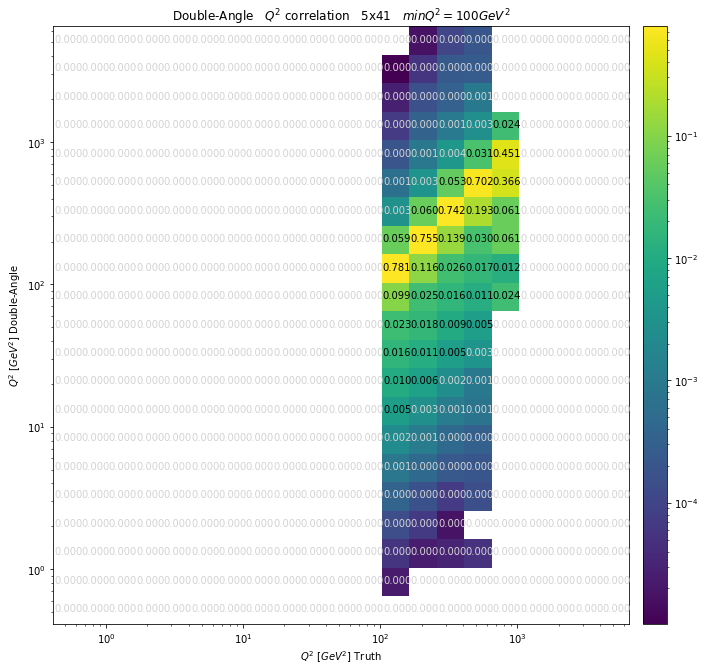

In [64]:
minQ2 = 100
Q2_List_T_F = [[],[],[],[],[]]
Q2_List_DA_F = [[],[],[],[],[]]

Q2_List_T = [Q2_100_1_T[0],Q2_100_2_T[0],Q2_100_3_T[0],Q2_100_4_T[0],Q2_100_5_T[0]]
Q2_List_DA = [Q2_100_1_DA[0],Q2_100_2_DA[0],Q2_100_3_DA[0],Q2_100_4_DA[0],Q2_100_5_DA[0]]

for i in range(5):
    T_len = ak.count(Q2_List_T[i],axis=0) #total number of events in Truth
    DA_len = ak.count(Q2_List_DA[i],axis=0) #total number of events in DA
    if T_len > DA_len: #if total number of events for Truth is greater than DA
        DA_boolean = ak.count(Q2_List_DA[i],axis=-1) >= 1 #boolean to filter events that corresponds to record of a single event in DA
        Q2_List_T_F[i] = ak.flatten( Q2_List_T[i][DA_boolean]) 
        Q2_List_DA_F[i] = ak.flatten( Q2_List_DA[i][DA_boolean])
    else: #if total number of events for DA is greater than Truth
        T_boolean = ak.count(Q2_List_T[i],axis=-1) >= 1 #boolean to filter events that corresponds to record of a single event in Truth
        Q2_List_T_F[i] = ak.flatten( Q2_List_T[i][T_boolean])
        Q2_List_DA_F[i] = ak.flatten( Q2_List_DA[i][T_boolean])
T_Q2s = ak.flatten(Q2_List_T_F)
DA_Q2s = ak.flatten(Q2_List_DA_F)


fig = plt.figure()
(h, xedges, yedges, image) =plt.hist2d(x=T_Q2s,y=DA_Q2s, bins=[Q2_bins,Q2_bins],norm=mpl.colors.LogNorm())
plt.close()


minQ2_dict = {'1':2,'10':7,'100':12,'1000':17} #Q2 bin index at which minQ2 starts
minQ2_lim = minQ2_dict['{}'.format(minQ2)]
h[0:minQ2_lim]=0 #ignore values before minQ2

col_sum = ak.sum(h,axis=-1) #number of events in each column 
norm_h = [] #normalized grid
for i in range(len(col_sum)):
    alpha = h[i]/col_sum[i]
    norm_h.append(alpha)


#change np.nan values to 0
norm_h[0][:] = 0.0
norm_h[1][:] = 0.0
norm_h[2][:] = 0.0
norm_h[3][:] = 0.0
norm_h[4][:] = 0.0
norm_h[5][:] = 0.0
norm_h[6][:] = 0.0
norm_h[7][:] = 0.0
norm_h[8][:] = 0.0
norm_h[9][:] = 0.0
norm_h[10][:] = 0.0
norm_h[11][:] = 0.0
norm_h[-1][:] = 0.0
norm_h[-2][:] = 0.0
norm_h[-3][:] = 0.0
norm_h[-4][:] = 0.0


norm_h_text = []
for i in range(len(col_sum)):
    alpha = norm_h[i]
    alpha2 = [ '%.3f' % elem for elem in alpha ] #display value to 3 sig fig
    norm_h_text.append(alpha2)
    
    
fig = plt.figure()
mplhep.hist2dplot(H=norm_h,norm=mpl.colors.LogNorm(),labels=norm_h_text,xbins=Q2_bins,ybins=Q2_bins,cmax=1,cmin=1e-5)
plt.yscale('log')
plt.xscale('log')
fig.set_figwidth(11)
fig.set_figheight(11)
plt.xlabel('$Q^2$ [$GeV^2$] Truth')
plt.ylabel('$Q^2$ [$GeV^2$] Double-Angle')
plt.title('Double-Angle   $Q^2$ correlation   {}x{}   $minQ^2=${}$GeV^2$'.format(k,p,minQ2))
plt.show()


# $x$ correlation

## $min Q^2 = 1$

<ipython-input-65-6a41162e65a2>:37: RuntimeWarning: invalid value encountered in true_divide
  alpha = h[i]/col_sum[i]
<ipython-input-65-6a41162e65a2>:87: RuntimeWarning: invalid value encountered in true_divide
  alpha = h[i]/col_sum[i]


Text(0.5, 1.0, 'Double-Angle   $x$ correlation   5x41   $minQ^2=$1$GeV^2$')

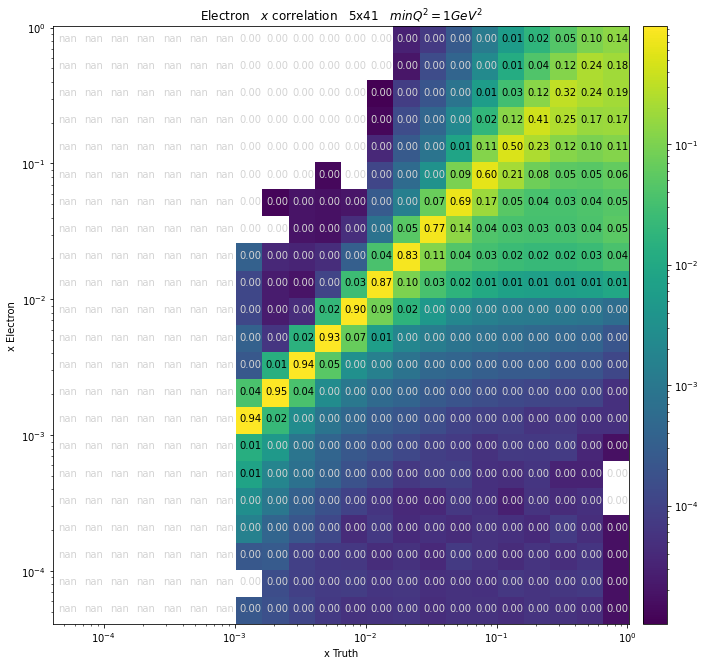

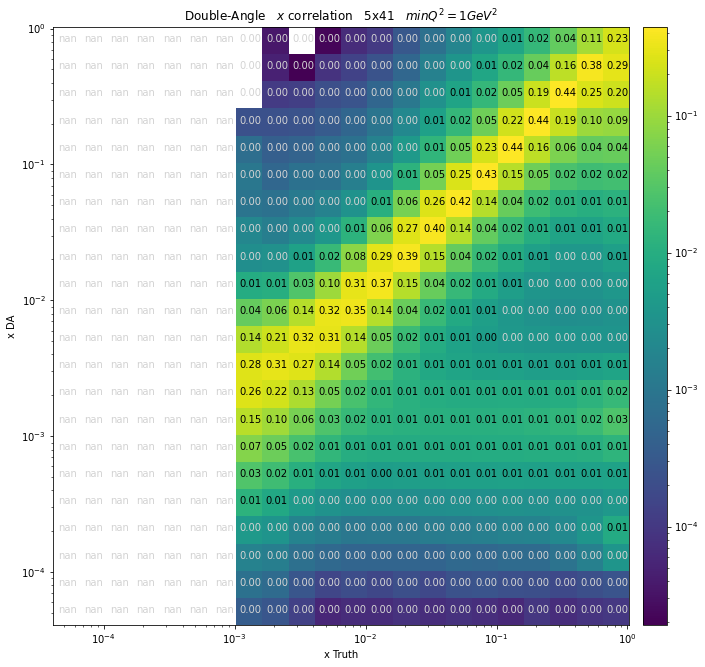

In [65]:
minQ2 = 1

X_List_T_F = [[],[],[],[],[]]
X_List_E_F = [[],[],[],[],[]]

X_List_T = [Q2_1_1_T[1],Q2_1_2_T[1],Q2_1_3_T[1],Q2_1_4_T[1],Q2_1_5_T[1]]
X_List_E = [Q2_1_1_E[1],Q2_1_2_E[1],Q2_1_3_E[1],Q2_1_4_E[1],Q2_1_5_E[1]]

for i in range(5):
    T_len = ak.count(X_List_T[i],axis=0)
    E_len = ak.count(X_List_E[i],axis=0)
    if T_len > E_len:
        E_boolean = ak.count(X_List_E[i],axis=-1) >= 1
        X_List_T_F[i] = ak.flatten(X_List_T[i][E_boolean])
        X_List_E_F[i] = ak.flatten(X_List_E[i][E_boolean])
    else:
        T_boolean = ak.count(X_List_T[i],axis=-1) >= 1
        X_List_T_F[i] = ak.flatten(X_List_T[i][T_boolean])
        X_List_E_F[i] = ak.flatten(X_List_E[i][T_boolean])

T_Xs = ak.flatten(X_List_T_F)
E_Xs = ak.flatten(X_List_E_F)

T_x_bool = T_Xs>=minQ2/(4*k*p)
T_Xs = T_Xs[T_x_bool]
E_Xs = E_Xs[T_x_bool]

fig = plt.figure()
(h, xedges, yedges, image) =plt.hist2d(x=T_Xs,y=E_Xs, bins=[x_bins,x_bins],norm=mpl.colors.LogNorm())
plt.close()

col_sum = ak.sum(h,axis=-1)

norm_h = []
norm_h_text = []
for i in range(len(col_sum)):
    alpha = h[i]/col_sum[i]
    norm_h.append(alpha)
    alpha2 = [ '%.2f' % elem for elem in alpha ]
    norm_h_text.append(alpha2)

fig = plt.figure()
mplhep.hist2dplot(H=norm_h,norm=mpl.colors.LogNorm(),labels=norm_h_text,xbins=x_bins,ybins=x_bins,cmax=1,cmin=1e-5)
plt.yscale('log')
plt.xscale('log')
fig.set_figwidth(11)
fig.set_figheight(11)
plt.xlabel('x Truth')
plt.ylabel('x Electron')
plt.title('Electron   $x$ correlation   {}x{}   $minQ^2=${}$GeV^2$'.format(k,p,minQ2))


X_List_T_F = [[],[],[],[],[]]
X_List_DA_F = [[],[],[],[],[]]

X_List_T = [Q2_1_1_T[1],Q2_1_2_T[1],Q2_1_3_T[1],Q2_1_4_T[1],Q2_1_5_T[1]]
X_List_DA = [Q2_1_1_DA[1],Q2_1_2_DA[1],Q2_1_3_DA[1],Q2_1_4_DA[1],Q2_1_5_DA[1]]

for i in range(5):
    T_len = ak.count(X_List_T[i],axis=0)
    DA_len = ak.count(X_List_DA[i],axis=0)
    if T_len > DA_len:
        E_boolean = ak.count(X_List_DA[i],axis=-1) >= 1
        X_List_T_F[i] = ak.flatten(X_List_T[i][E_boolean])
        X_List_DA_F[i] = ak.flatten(X_List_DA[i][E_boolean])
    else:
        T_boolean = ak.count(X_List_T[i],axis=-1) >= 1
        X_List_T_F[i] = ak.flatten(X_List_T[i][T_boolean])
        X_List_DA_F[i] = ak.flatten(X_List_DA[i][T_boolean])


T_Xs = ak.flatten(X_List_T_F)
DA_Xs = ak.flatten(X_List_DA_F)

T_x_bool = T_Xs>=minQ2/(4*k*p)
T_Xs = T_Xs[T_x_bool]
DA_Xs = DA_Xs[T_x_bool]

fig = plt.figure()
(h, xedges, yedges, image) =plt.hist2d(x=T_Xs,y=DA_Xs, bins=[x_bins,x_bins],norm=mpl.colors.LogNorm())
plt.close()
col_sum = ak.sum(h,axis=-1)

norm_h = []
norm_h_text = []
for i in range(len(col_sum)):
    alpha = h[i]/col_sum[i]
    norm_h.append(alpha)
    alpha2 = [ '%.2f' % elem for elem in alpha ]
    norm_h_text.append(alpha2)


fig = plt.figure()
mplhep.hist2dplot(H=norm_h,norm=mpl.colors.LogNorm(),labels=norm_h_text,xbins=x_bins,ybins=x_bins,cmax=1,cmin=1e-5)
plt.yscale('log')
plt.xscale('log')
fig.set_figwidth(11)
fig.set_figheight(11)
plt.xlabel('x Truth')
plt.ylabel('x DA')
plt.title('Double-Angle   $x$ correlation   {}x{}   $minQ^2=${}$GeV^2$'.format(k,p,minQ2))

## $min Q^2 = 10$

<ipython-input-66-326c6bc063c0>:40: RuntimeWarning: invalid value encountered in true_divide
  alpha = h[i]/col_sum[i]
<ipython-input-66-326c6bc063c0>:90: RuntimeWarning: invalid value encountered in true_divide
  alpha = h[i]/col_sum[i]


Text(0.5, 1.0, 'Double-Angle   $x$ correlation   5x41   $minQ^2=$10$GeV^2$')

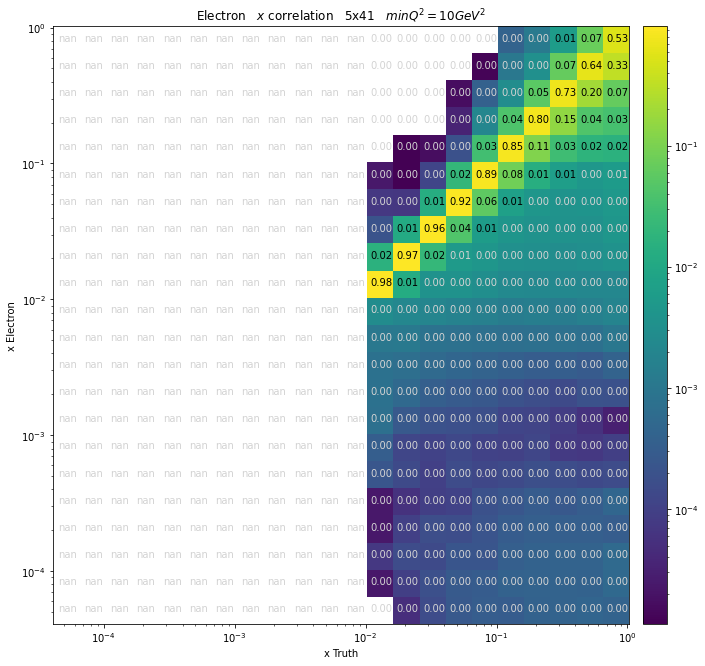

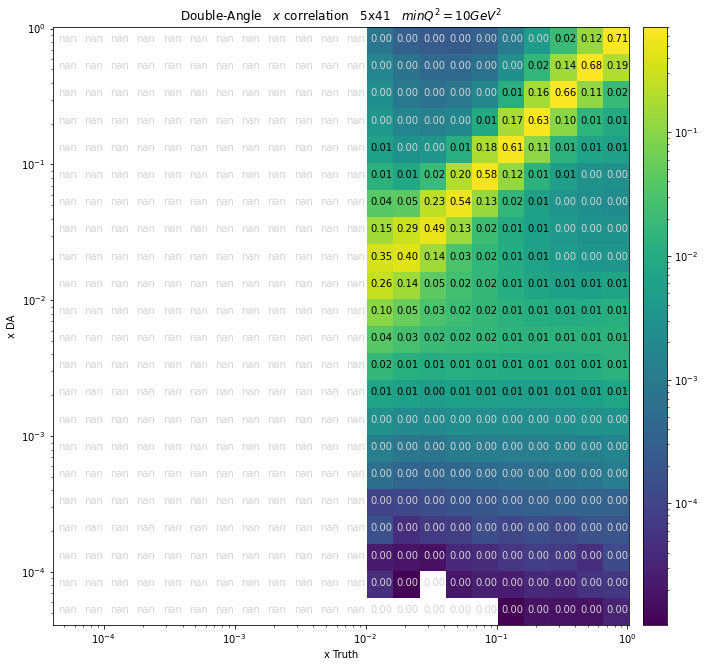

In [66]:
minQ2 = 10
server = '~/projects/def-wdconinc/tooba/deathvalley/{}x{}/minQ2={}/'.format(k,p,minQ2)
file = 'pythia8NCDIS_{}x{}_minQ2={}_beamEffects_xAngle=-0.025_hiDiv_vtxfix_'.format(k,p,minQ2)


X_List_T_F = [[],[],[],[],[]]
X_List_E_F = [[],[],[],[],[]]

X_List_T = [Q2_10_1_T[1],Q2_10_2_T[1],Q2_10_3_T[1],Q2_10_4_T[1],Q2_10_5_T[1]]
X_List_E = [Q2_10_1_E[1],Q2_10_2_E[1],Q2_10_3_E[1],Q2_10_4_E[1],Q2_10_5_E[1]]

for i in range(5):
    T_len = ak.count(X_List_T[i],axis=0)
    E_len = ak.count(X_List_E[i],axis=0)
    if T_len > E_len:
        E_boolean = ak.count(X_List_E[i],axis=-1) >= 1
        X_List_T_F[i] = ak.flatten(X_List_T[i][E_boolean])
        X_List_E_F[i] = ak.flatten(X_List_E[i][E_boolean])
    else:
        T_boolean = ak.count(X_List_T[i],axis=-1) >= 1
        X_List_T_F[i] = ak.flatten(X_List_T[i][T_boolean])
        X_List_E_F[i] = ak.flatten(X_List_E[i][T_boolean])

T_Xs = ak.flatten(X_List_T_F)
E_Xs = ak.flatten(X_List_E_F)
T_x_bool = T_Xs>=minQ2/(4*k*p)
T_Xs = T_Xs[T_x_bool]
E_Xs = E_Xs[T_x_bool]

fig = plt.figure()

(h, xedges, yedges, image) =plt.hist2d(x=T_Xs,y=E_Xs, bins=[x_bins,x_bins],norm=mpl.colors.LogNorm())
plt.close()

col_sum = ak.sum(h,axis=-1)

norm_h = []
norm_h_text = []
for i in range(len(col_sum)):
    alpha = h[i]/col_sum[i]
    norm_h.append(alpha)
    alpha2 = [ '%.2f' % elem for elem in alpha ]
    norm_h_text.append(alpha2)

fig = plt.figure()
mplhep.hist2dplot(H=norm_h,norm=mpl.colors.LogNorm(),labels=norm_h_text,xbins=x_bins,ybins=x_bins,cmax=1,cmin=1e-5)
plt.yscale('log')
plt.xscale('log')
fig.set_figwidth(11)
fig.set_figheight(11)
plt.xlabel('x Truth')
plt.ylabel('x Electron')
plt.title('Electron   $x$ correlation   {}x{}   $minQ^2=${}$GeV^2$'.format(k,p,minQ2))


X_List_T_F = [[],[],[],[],[]]
X_List_DA_F = [[],[],[],[],[]]

X_List_T = [Q2_10_1_T[1],Q2_10_2_T[1],Q2_10_3_T[1],Q2_10_4_T[1],Q2_10_5_T[1]]
X_List_DA = [Q2_10_1_DA[1],Q2_10_2_DA[1],Q2_10_3_DA[1],Q2_10_4_DA[1],Q2_10_5_DA[1]]

for i in range(5):
    T_len = ak.count(X_List_T[i],axis=0)
    DA_len = ak.count(X_List_DA[i],axis=0)
    if T_len > DA_len:
        E_boolean = ak.count(X_List_DA[i],axis=-1) >= 1
        X_List_T_F[i] = ak.flatten(X_List_T[i][E_boolean])
        X_List_DA_F[i] = ak.flatten(X_List_DA[i][E_boolean])
    else:
        T_boolean = ak.count(X_List_T[i],axis=-1) >= 1
        X_List_T_F[i] = ak.flatten(X_List_T[i][T_boolean])
        X_List_DA_F[i] = ak.flatten(X_List_DA[i][T_boolean])


T_Xs = ak.flatten(X_List_T_F)
DA_Xs = ak.flatten(X_List_DA_F)
T_x_bool = T_Xs>=minQ2/(4*k*p)
T_Xs = T_Xs[T_x_bool]
DA_Xs = DA_Xs[T_x_bool]

fig = plt.figure()

(h, xedges, yedges, image) =plt.hist2d(x=T_Xs,y=DA_Xs, bins=[x_bins,x_bins],norm=mpl.colors.LogNorm())
plt.close()
col_sum = ak.sum(h,axis=-1)

norm_h = []
norm_h_text = []
for i in range(len(col_sum)):
    alpha = h[i]/col_sum[i]
    norm_h.append(alpha)
    alpha2 = [ '%.2f' % elem for elem in alpha ]
    norm_h_text.append(alpha2)


fig = plt.figure()
mplhep.hist2dplot(H=norm_h,norm=mpl.colors.LogNorm(),labels=norm_h_text,xbins=x_bins,ybins=x_bins,cmax=1,cmin=1e-5)
plt.yscale('log')
plt.xscale('log')
fig.set_figwidth(11)
fig.set_figheight(11)
plt.xlabel('x Truth')
plt.ylabel('x DA')
plt.title('Double-Angle   $x$ correlation   {}x{}   $minQ^2=${}$GeV^2$'.format(k,p,minQ2))

## $min Q^2 = 100$

<ipython-input-67-59ddc886ffbe>:40: RuntimeWarning: invalid value encountered in true_divide
  alpha = h[i]/col_sum[i]
<ipython-input-67-59ddc886ffbe>:90: RuntimeWarning: invalid value encountered in true_divide
  alpha = h[i]/col_sum[i]


Text(0.5, 1.0, 'Double-Angle   $x$ correlation   5x41   $minQ^2=$100$GeV^2$')

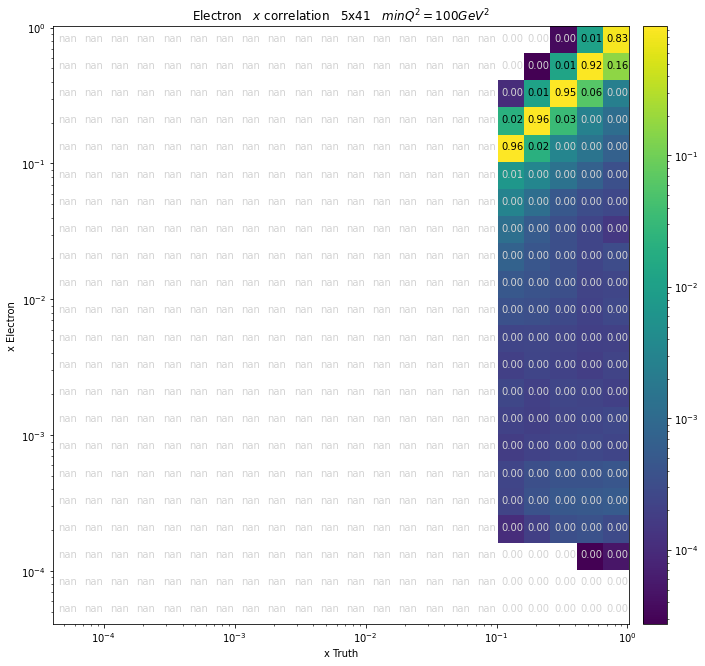

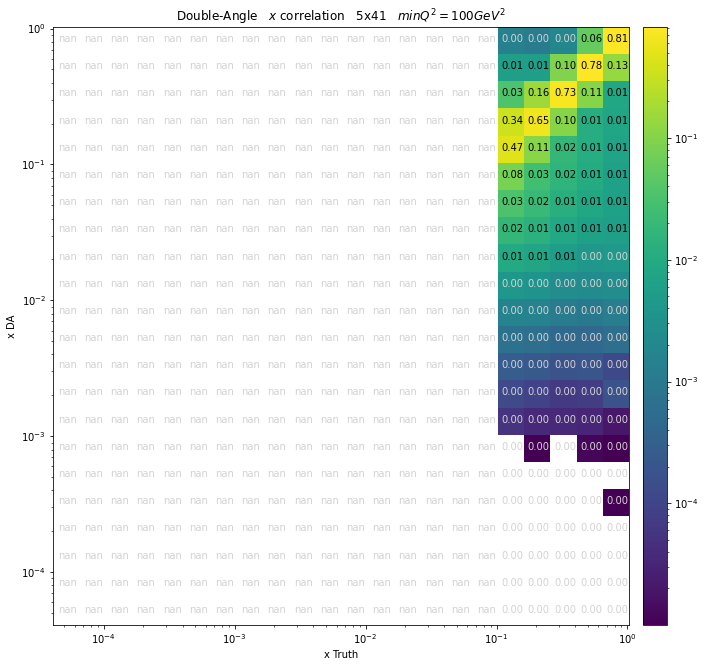

In [67]:
minQ2 = 100
server = '~/projects/def-wdconinc/tooba/deathvalley/{}x{}/minQ2={}/'.format(k,p,minQ2)
file = 'pythia8NCDIS_{}x{}_minQ2={}_beamEffects_xAngle=-0.025_hiDiv_vtxfix_'.format(k,p,minQ2)


X_List_T_F = [[],[],[],[],[]]
X_List_E_F = [[],[],[],[],[]]

X_List_T = [Q2_100_1_T[1],Q2_100_2_T[1],Q2_100_3_T[1],Q2_100_4_T[1],Q2_100_5_T[1]]
X_List_E = [Q2_100_1_E[1],Q2_100_2_E[1],Q2_100_3_E[1],Q2_100_4_E[1],Q2_100_5_E[1]]

for i in range(5):
    T_len = ak.count(X_List_T[i],axis=0)
    E_len = ak.count(X_List_E[i],axis=0)
    if T_len > E_len:
        E_boolean = ak.count(X_List_E[i],axis=-1) >= 1
        X_List_T_F[i] = ak.flatten(X_List_T[i][E_boolean])
        X_List_E_F[i] = ak.flatten(X_List_E[i][E_boolean])
    else:
        T_boolean = ak.count(X_List_T[i],axis=-1) >= 1
        X_List_T_F[i] = ak.flatten(X_List_T[i][T_boolean])
        X_List_E_F[i] = ak.flatten(X_List_E[i][T_boolean])

T_Xs = ak.flatten(X_List_T_F)
E_Xs = ak.flatten(X_List_E_F)
T_x_bool = T_Xs>=minQ2/(4*k*p)
T_Xs = T_Xs[T_x_bool]
E_Xs = E_Xs[T_x_bool]

fig = plt.figure()

(h, xedges, yedges, image) =plt.hist2d(x=T_Xs,y=E_Xs, bins=[x_bins,x_bins],norm=mpl.colors.LogNorm())
plt.close()

col_sum = ak.sum(h,axis=-1)

norm_h = []
norm_h_text = []
for i in range(len(col_sum)):
    alpha = h[i]/col_sum[i]
    norm_h.append(alpha)
    alpha2 = [ '%.2f' % elem for elem in alpha ]
    norm_h_text.append(alpha2)

fig = plt.figure()
mplhep.hist2dplot(H=norm_h,norm=mpl.colors.LogNorm(),labels=norm_h_text,xbins=x_bins,ybins=x_bins,cmax=1,cmin=1e-5)
plt.yscale('log')
plt.xscale('log')
fig.set_figwidth(11)
fig.set_figheight(11)
plt.xlabel('x Truth')
plt.ylabel('x Electron')
plt.title('Electron   $x$ correlation   {}x{}   $minQ^2=${}$GeV^2$'.format(k,p,minQ2))


X_List_T_F = [[],[],[],[],[]]
X_List_DA_F = [[],[],[],[],[]]

X_List_T = [Q2_100_1_T[1],Q2_100_2_T[1],Q2_100_3_T[1],Q2_100_4_T[1],Q2_100_5_T[1]]
X_List_DA = [Q2_100_1_DA[1],Q2_100_2_DA[1],Q2_100_3_DA[1],Q2_100_4_DA[1],Q2_100_5_DA[1]]

for i in range(5):
    T_len = ak.count(X_List_T[i],axis=0)
    DA_len = ak.count(X_List_DA[i],axis=0)
    if T_len > DA_len:
        E_boolean = ak.count(X_List_DA[i],axis=-1) >= 1
        X_List_T_F[i] = ak.flatten(X_List_T[i][E_boolean])
        X_List_DA_F[i] = ak.flatten(X_List_DA[i][E_boolean])
    else:
        T_boolean = ak.count(X_List_T[i],axis=-1) >= 1
        X_List_T_F[i] = ak.flatten(X_List_T[i][T_boolean])
        X_List_DA_F[i] = ak.flatten(X_List_DA[i][T_boolean])


T_Xs = ak.flatten(X_List_T_F)
DA_Xs = ak.flatten(X_List_DA_F)
T_x_bool = T_Xs>=minQ2/(4*k*p)
T_Xs = T_Xs[T_x_bool]
DA_Xs = DA_Xs[T_x_bool]

fig = plt.figure()

(h, xedges, yedges, image) =plt.hist2d(x=T_Xs,y=DA_Xs, bins=[x_bins,x_bins],norm=mpl.colors.LogNorm())
plt.close()
col_sum = ak.sum(h,axis=-1)

norm_h = []
norm_h_text = []
for i in range(len(col_sum)):
    alpha = h[i]/col_sum[i]
    norm_h.append(alpha)
    alpha2 = [ '%.2f' % elem for elem in alpha ]
    norm_h_text.append(alpha2)


fig = plt.figure()
mplhep.hist2dplot(H=norm_h,norm=mpl.colors.LogNorm(),labels=norm_h_text,xbins=x_bins,ybins=x_bins,cmax=1,cmin=1e-5)
plt.yscale('log')
plt.xscale('log')
fig.set_figwidth(11)
fig.set_figheight(11)
plt.xlabel('x Truth')
plt.ylabel('x DA')
plt.title('Double-Angle   $x$ correlation   {}x{}   $minQ^2=${}$GeV^2$'.format(k,p,minQ2))